# Section 6.4: Practical Lecture Material 6

This page contains simulations of Practical Lecture Material 6: Phase retrieval

## Contents

    - Spectra of $H$ versus the limiting law
    - phase transition behavior of the top eigenvalue-eigenvector pair


## Spectra of $H$ versus the limiting law



In [5]:
import numpy as np
import scipy.sparse.linalg
import matplotlib.pyplot as plt
pi = np.pi

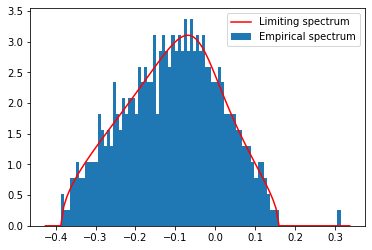

In [3]:
coeff = 2
p = 250*coeff
n = 1500*coeff
c = p/n

# processing/truncating function
# f = lambda t : t
f = lambda t : (np.maximum(t,0)-1)/(np.maximum(t,0)+np.sqrt(2/c)-1)

value_posit = 100
alpha = np.concatenate([np.zeros(value_posit-1),[1],np.zeros(p-value_posit)]) # vector to recover
alpha = alpha/np.linalg.norm(alpha)

X = np.random.randn(p,n)
v = X.T@alpha
y = v**2
fD = np.diag(f(y))
eigs_fD = np.diag(fD)

H = X@fD@X.T/n
eigs_H = np.linalg.eig(H)[0]

if np.min(eigs_H)<0:
    edges = np.linspace(np.min(eigs_H)*1.1,np.max(eigs_H)*1.1, 100)
else:
    edges = np.linspace(np.min(eigs_H)*0.9,np.max(eigs_H)*1.1, 100)

y = 1e-5
zs = edges+y*1j
dens = np.zeros(len(zs))

m=1
for i,z in enumerate(zs):
    m_tmp=-1
    while np.abs(m-m_tmp)>1e-6:
        m_tmp=m
        m = 1/( -z + np.mean(eigs_fD/(1+c*m*eigs_fD)))

    dens[i]=np.imag(m)/pi

plt.hist(eigs_H,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(p),label='Empirical spectrum')
plt.plot(edges,dens,'r',label='Limiting spectrum')
_ = plt.legend()

## Phase transition behavior of the top eigenvalue-eigenvector pair

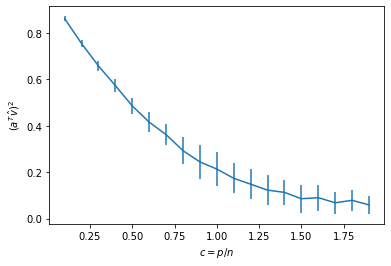

In [30]:
coeff = 1
p = 500*coeff
c_loop = np.arange(.1,2,.1)
n_loop = (p/c_loop).astype(int)

alpha = np.concatenate([-np.ones(p//2),np.ones(p//2)])
alpha = alpha/np.linalg.norm(alpha)

nb_average_loop = 50
store_align = np.zeros( (len(n_loop),nb_average_loop) )
for n_index in range(len(n_loop)):
    n = n_loop[n_index]
    c = p/n

    # processing/truncating function
    # f = lambda t : t
    f = lambda t : (np.maximum(t,0)-1)/(np.maximum(t,0)+np.sqrt(2/c)-1)

    for average_loop in range(nb_average_loop):
        X = np.random.randn(p,n)
        v = X.T@alpha
        y = v**2
        fD = np.diag(f(y))
        eigs_fD = np.diag(fD)
        H = X@fD@(X.T)/n
        hat_v = scipy.sparse.linalg.eigs(H,1,which='LR')[1].reshape(p)

        store_align[n_index, average_loop] = np.abs(alpha@hat_v)**2
    
plt.errorbar(c_loop, np.mean(store_align,1), np.std(store_align,1))
plt.xlabel(r'$c= p/n$')
plt.ylabel(r'($a^T \hat{v})^2$')
_ = plt.show()